In [1]:
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer

loaders = {
    "iris": load_iris,
    "digits": load_digits,
    "wine": load_wine,
    "breast_cancer": load_breast_cancer
}

In [2]:
dataset = load_iris()
X, y = dataset["data"], dataset["target"]

In [3]:
from decision_tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth=3,
    min_samples=1,
    feature_names=dataset['feature_names'],
    target_names=dataset['target_names'],
)

In [4]:
from sklearn.model_selection import KFold
import numpy as np

cv_scores = []
for train_idx, test_idx in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model.fit(X_train, y_train)
    cv_scores.append(model.score(X_test, y_test))
print(np.mean(cv_scores))

0.887936507936508


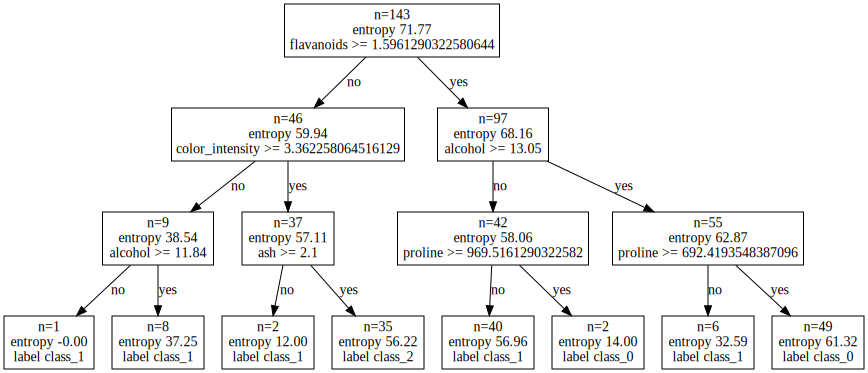

In [5]:
from graphviz import Source

Source(model.dot())